In [2]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install("ComplexHeatmap")
# install.packages(c('ClusterR','tidyverse'))
suppressMessages(require(ComplexHeatmap))
suppressMessages(require(tidyverse))
suppressMessages(require(data.table))
require(RColorBrewer)
require(ClusterR)
require(pracma)

In [3]:
(dat <- fread('../data_processed/plot_dat.csv') %>%column_to_rownames('V1')) %>%  head(1)
dat %>% dim

,0.5_867451,0.5_867454,0.5_867457,0.5_867478,0.5_867481,0.5_867484,1_926614,1_494014,1_494017,1_494020,⋯,7_685178,7_685217,7_821662,7_823408,7_839434,7_839446,7_833455,7_840319,7_834112,7_995287
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
March1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 10564    74

In [41]:
(glist <- fread("./selected_features_log.csv", header = T) %>% column_to_rownames("gene") %>% 
    select(-V1)) %>% head(1)

,coef
,<dbl>
Cdca5,0.002316568


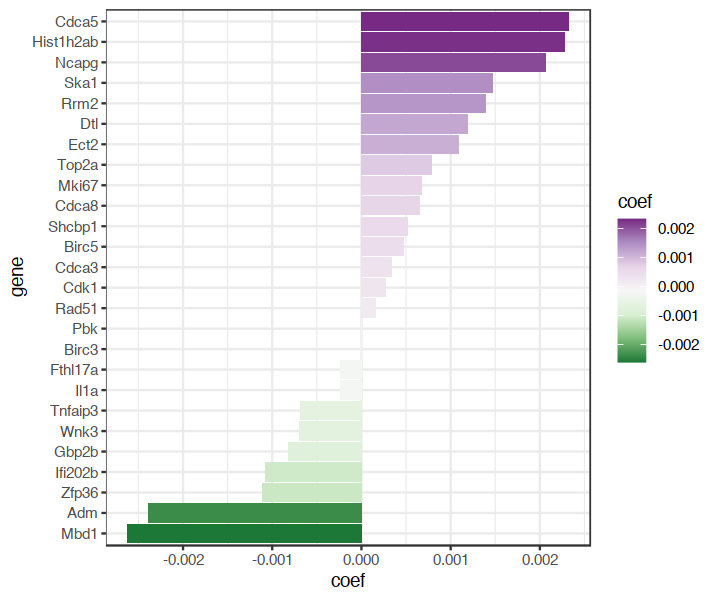

In [42]:
options(repr.plot.width = 6, repr.plot.height = 5)

ggplot(glist %>% rownames_to_column("gene") %>% mutate(gene = factor(gene, levels = glist %>% 
    rownames %>% rev))) + geom_bar(aes(gene, coef, fill = coef), stat = "identity") + 
    scale_fill_distiller(palette = "PRGn") + coord_flip() + theme_bw()

Warning message:
“The input is a data frame, convert it to the matrix.”


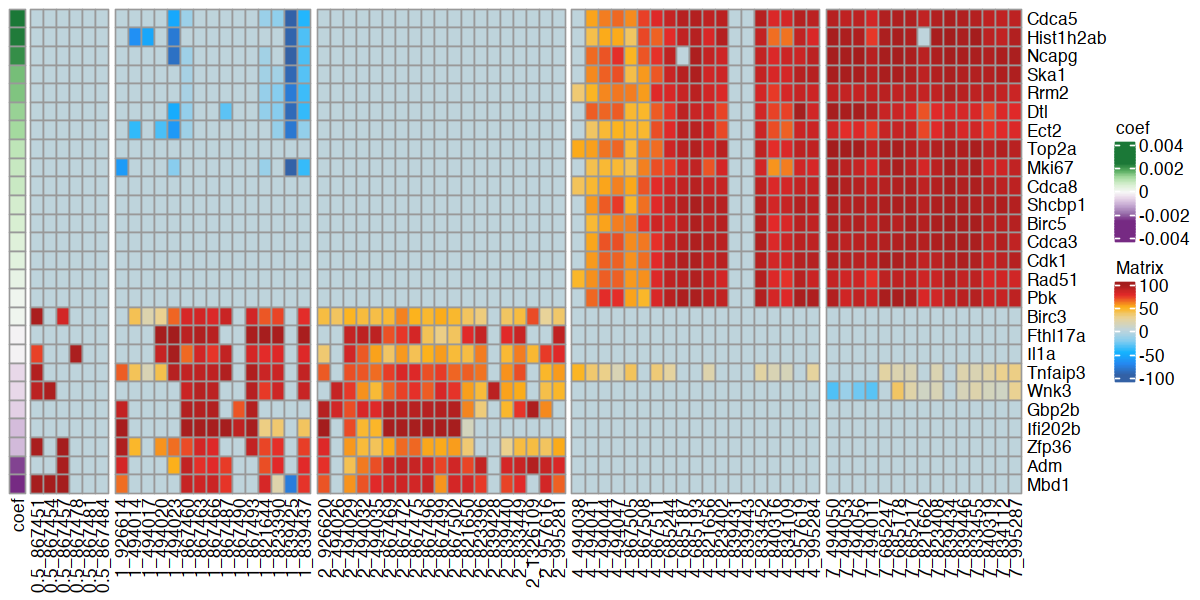

In [43]:
options(repr.plot.width = 10, repr.plot.height = 5)
pal_atac <- colorRampPalette(c("#3361A5", "#248AF3", "#14B3FF", "#88CEEF", "#C1D5DC", 
    "#EAD397", "#FDB31A", "#E42A2A", "#A31D1D"))(100)
col.gap = dat %>% colnames %>% sapply(., function(x) (strsplit(x, split = "_") %>% 
    unlist)[1]) %>% table %>% cumsum

pheatmap(dat[glist %>% rownames, ], annotation_row = glist, gaps_col = col.gap, scale = "none", 
    annotation_colors = list(coef = colorRampPalette(brewer.pal(9, "PRGn"))(50)), 
    color = pal_atac, cluster_rows = F, cluster_cols = F, show_rownames = T, )